## Principal Component Analysis
It is an unsupervised machine learning algorithm. The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information. 
Steps to conduct PCA - 
1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW(where every column represents an eigenvector)
6. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: yy=WWT×xx (where xx is a d×1-dimensional vector representing one sample, and yy is the transformed k×1-dimensional sample in the new subspace.)

Populating the interactive namespace from numpy and matplotlib


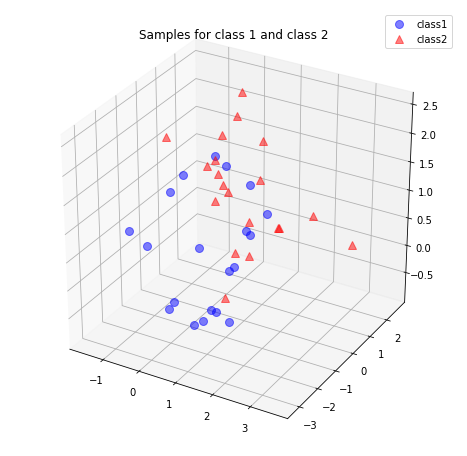

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

%pylab inline
np.random.seed(2019)

# Creating two 3x20 datasets,for each class w1 and w2
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [3]:
# Step 1 - Taking the whole dataset ignoring the class labels
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"
print(all_samples)

[[-2.17678964e-01  1.33186404e+00  5.73761426e-01  9.53490244e-01
   1.69048971e-02 -1.89312608e-01  8.45930444e-01  6.49686295e-02
   8.07276694e-01  4.86689269e-01 -8.12374820e-01  2.17421150e-01
  -9.93947661e-01  2.37740861e-01 -1.54936294e+00 -1.73086208e-01
   1.83899710e+00 -5.77093453e-01  3.16934063e-01 -3.77850225e-01
   2.47998549e+00  1.36062884e+00  3.38362782e-01 -5.53326830e-01
   4.61434057e-01 -6.60173381e-01 -1.55938452e+00  2.47171050e+00
   1.26334763e+00  3.11085940e-01  3.07623938e-01  7.24072634e-01
   6.27687762e-01 -3.52657940e-01  7.59120744e-01  3.93848457e-01
   1.34289703e+00 -4.88889770e-02  7.33259447e-02  3.59556524e+00]
 [ 8.21455355e-01 -3.61865372e-01  2.87727666e-01 -1.68962530e+00
  -5.14983522e-01  2.67217242e+00 -5.03541582e-01 -3.20504023e+00
   4.74140554e-01 -5.35529709e-01 -4.50792943e-01 -1.17585859e+00
   5.86806309e-01 -7.75056563e-01 -1.20682824e+00  1.48894719e+00
  -4.39362125e-01 -1.03104440e+00  3.53253981e-01 -1.09267955e+00
  -1.1053

In [4]:
# Step 2 - Computing the d-dimensional mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print("Mean vector: \n", mean_vector)

Mean vector: 
 [[0.40343843]
 [0.15078263]
 [0.6078297 ]]


In [6]:
# Step 3.a - Computing the Scatter Matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
    
print("Scatter Matrix: \n", scatter_matrix)

Scatter Matrix: 
 [[42.24670893 -3.54584864  0.23042155]
 [-3.54584864 51.32858067 13.38024445]
 [ 0.23042155 13.38024445 35.45372908]]


In [7]:
# Step 3.b - Computing covariance, we actually do not need covariance calculation since we already have calculated scatter matrix.
# The only difference is that in covariance matrix, we divide all elements by N-1
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print("Covariance Matrix: \n", cov_mat)

Covariance Matrix: 
 [[ 1.08324895 -0.0909192   0.00590824]
 [-0.0909192   1.31611745  0.34308319]
 [ 0.00590824  0.34308319  0.90906998]]


In [10]:
# Step 4 - Computing eigenvectors and corresponding eigenvalues
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')
    

Eigenvector 1: 
[[ 0.17099416]
 [-0.86134821]
 [-0.47837251]]
Eigenvalue 1 from scatter matrix: 59.463572286829546
Eigenvalue 1 from covariance matrix: 1.524706981713577
Scaling factor:  39.00000000000003
----------------------------------------
Eigenvector 2: 
[[-0.9760435 ]
 [-0.08178994]
 [-0.20161719]]
Eigenvalue 2 from scatter matrix: 41.99717313376486
Eigenvalue 2 from covariance matrix: 1.0768505931734562
Scaling factor:  39.000000000000064
----------------------------------------
Eigenvector 3: 
[[-0.13453655]
 [-0.50138774]
 [ 0.85469893]]
Eigenvalue 3 from scatter matrix: 27.568273258081337
Eigenvalue 3 from covariance matrix: 0.7068788014892649
Scaling factor:  39.000000000000014
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


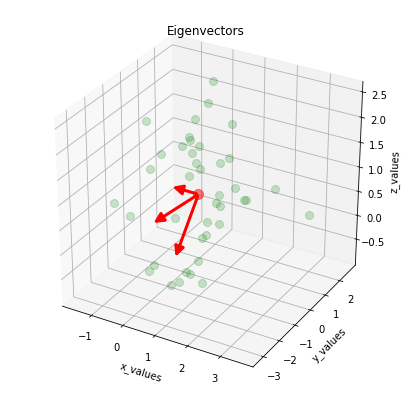

In [11]:
# Visualizing eigenvectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [12]:
# Step 5.a - Sorting the eigenvectors by decreasing eigenvalues
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

59.463572286829546
41.99717313376486
27.568273258081337


In [13]:
# Step 5.b - Choosign k eigenvectors with the largest eigenvalues
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.17099416 -0.9760435 ]
 [-0.86134821 -0.08178994]
 [-0.47837251 -0.20161719]]


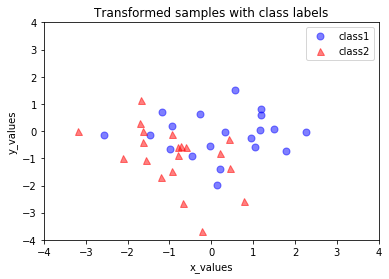

In [15]:
# Step 6 - Transforming the samples onto the new subspace
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()